## EvC Energy consumption Analysis

In [322]:
import json
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#avoid warnings
import warnings
warnings.filterwarnings("ignore")

#plt style
#plt.style.use('fivethirtyeight')
#import datetime


In [323]:
data = pd.read_csv('energy_consumption_clean_data.csv')

In [324]:
data.head()

,Unnamed: 0,Date,No Of Sessions,Unique Drivers,No. of Ports,Energy (kWh),GHG savings (kg),Charge time (minutes),Gasoline Savings (gallons),Speed_energy_transmittion,Month,Year,day,week_days,Energy (MWh)
0,0,2018-01-01,1,1,16,7,3,123,0.82,0.056911,Jan,2018,1,Monday,0.007
1,1,2018-01-02,2,1,16,18,7,24,0.31,0.750000,Jan,2018,2,Tuesday,0.018
2,2,2018-01-03,3,3,18,11,5,376,3.30,0.029255,Jan,2018,3,Wednesday,0.011
3,3,2018-01-04,6,6,20,50,21,406,3.59,0.123153,Jan,2018,4,Thursday,0.050
4,4,2018-01-05,2,2,20,3,1,62,0.37,0.048387,Jan,2018,5,Friday,0.003


In [325]:
data.shape

(606, 15)

606 columns and 15 rows

In [326]:
data.duplicated().sum()

0

In [327]:
data.isna().sum()

Unnamed: 0                    0
Date                          0
No Of Sessions                0
Unique Drivers                0
No. of Ports                  0
Energy (kWh)                  0
GHG savings (kg)              0
Charge time (minutes)         0
Gasoline Savings (gallons)    0
Speed_energy_transmittion     0
Month                         0
Year                          0
day                           0
week_days                     0
Energy (MWh)                  0
dtype: int64

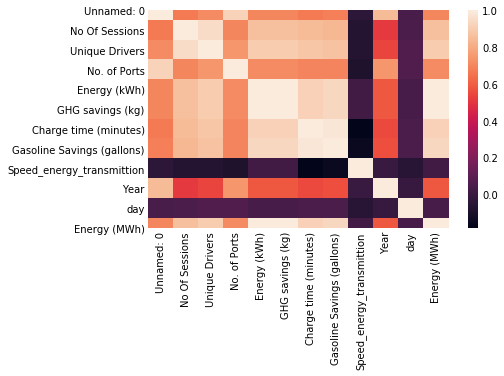

In [328]:

sns.heatmap(data.corr())

In [329]:
data.columns

Index(['Unnamed: 0', 'Date', 'No Of Sessions', 'Unique Drivers',
       'No. of Ports', 'Energy (kWh)', 'GHG savings (kg)',
       'Charge time (minutes)', 'Gasoline Savings (gallons)',
       'Speed_energy_transmittion', 'Month', 'Year', 'day', 'week_days',
       'Energy (MWh)'],
      dtype='object')

In [330]:
data['Date'].min()

'2018-01-01'

In [331]:
data['Date'].max()

'2019-08-29'

data is from jan 1 2018 to 30 aug 2019.

In [332]:
data.head(4)

,Unnamed: 0,Date,No Of Sessions,Unique Drivers,No. of Ports,Energy (kWh),GHG savings (kg),Charge time (minutes),Gasoline Savings (gallons),Speed_energy_transmittion,Month,Year,day,week_days,Energy (MWh)
0,0,2018-01-01,1,1,16,7,3,123,0.82,0.056911,Jan,2018,1,Monday,0.007
1,1,2018-01-02,2,1,16,18,7,24,0.31,0.750000,Jan,2018,2,Tuesday,0.018
2,2,2018-01-03,3,3,18,11,5,376,3.30,0.029255,Jan,2018,3,Wednesday,0.011
3,3,2018-01-04,6,6,20,50,21,406,3.59,0.123153,Jan,2018,4,Thursday,0.050


In [333]:
data = data.drop(['Date','Unnamed: 0'],axis = 1)

In [334]:
data = data.rename(columns={"No Of Sessions": "No_Of_Sessions", "Unique Drivers": "Unique_Drivers","No. of Ports":"No_of_ports","Energy (kWh)":"Energy_kwh","GHG savings (kg)":"GHG_savings_kg","Charge time (minutes)":"Charge_time","Gasoline Savings (gallons)":"Gasoline_Savings"})

In [335]:
data

,No_Of_Sessions,Unique_Drivers,No_of_ports,Energy_kwh,GHG_savings_kg,Charge_time,Gasoline_Savings,Speed_energy_transmittion,Month,Year,day,week_days,Energy (MWh)
0,1,1,16,7,3,123,0.820,0.056911,Jan,2018,1,Monday,0.007
1,2,1,16,18,7,24,0.310,0.750000,Jan,2018,2,Tuesday,0.018
2,3,3,18,11,5,376,3.300,0.029255,Jan,2018,3,Wednesday,0.011
3,6,6,20,50,21,406,3.590,0.123153,Jan,2018,4,Thursday,0.050
4,2,2,20,3,1,62,0.370,0.048387,Jan,2018,5,Friday,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,24,24,42,240,101,2658,30.111,0.090293,Aug,2019,25,Sunday,0.240
602,34,30,42,385,162,4310,48.358,0.089327,Aug,2019,26,Monday,0.385
603,36,34,42,343,144,4175,43.025,0.082156,Aug,2019,27,Tuesday,0.343
604,45,39,42,262,110,3829,32.870,0.068425,Aug,2019,28,Wednesday,0.262


In [336]:
data['Year'] = pd.get_dummies(data['Year'])

In [337]:
#categorical encoding
Months = pd.get_dummies(data['Month'])

In [338]:
Months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,0,1,0,0,0,0,0,0,0,0,0,0
602,0,1,0,0,0,0,0,0,0,0,0,0
603,0,1,0,0,0,0,0,0,0,0,0,0
604,0,1,0,0,0,0,0,0,0,0,0,0


In [339]:
weekdays = pd.get_dummies(data['week_days'])

In [340]:
#one hot encoding
weekdays

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
601,0,0,0,1,0,0,0
602,0,1,0,0,0,0,0
603,0,0,0,0,0,1,0
604,0,0,0,0,0,0,1


In [341]:
data = pd.concat([data,Months,weekdays],axis = 1)
data  = data.drop(['Month','week_days','Energy (MWh)'],axis = 1)

In [342]:
data.columns

Index(['No_Of_Sessions', 'Unique_Drivers', 'No_of_ports', 'Energy_kwh',
       'GHG_savings_kg', 'Charge_time', 'Gasoline_Savings',
       'Speed_energy_transmittion', 'Year', 'day', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [343]:
#decide variables
x = data.drop(['GHG_savings_kg','Gasoline_Savings','Energy_kwh'],axis = 1)
y = data['Energy_kwh']

In [344]:
x.columns

Index(['No_Of_Sessions', 'Unique_Drivers', 'No_of_ports', 'Charge_time',
       'Speed_energy_transmittion', 'Year', 'day', 'Apr', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [345]:
# Model building
# train_test split
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

## Prediction Energy consumed

### Linear Regression

In [346]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

In [347]:
lr.score(X_test,Y_test)*100

70.95952371128756

In [348]:
Engre = pd.DataFrame()
Engre['Actual'] = Y_test
Engre['Predicted'] = y_pred_lr

In [349]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_lr, Y_test)))


def mean_absolute_percentage_error(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE:"+ str(mean_absolute_percentage_error(Engre['Actual'],Engre['Predicted'])))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_lr,Y_test))))

MAE:17.70598616894546
MAPE:29.763252422467133
RMSE:4.207848163722814


### RandomF regressor

In [350]:
from sklearn.ensemble import RandomForestRegressor
rfr  =RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

In [351]:
rfr.score(X_test,Y_test)*100

94.06715470261489

In [352]:
Engre = pd.DataFrame()
Engre['Actual'] = Y_test
Engre['Predicted'] = y_pred_rfr

In [353]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_rfr, Y_test)))

def mean_absolute_percentage_error(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAPE:"+ str(mean_absolute_percentage_error(Engre['Actual'],Engre['Predicted'])))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_rfr,Y_test))))

MAE:9.33021978021978
MAPE:12.256431196863153
RMSE:3.0545408460552266


### Lasso Regression

In [354]:
from sklearn.linear_model import Lasso
l = Lasso()
l.fit(X_train, Y_train)
y_pred_l = l.predict(X_test)

In [355]:
l.score(X_test,Y_test)*100

84.01952796345043

In [356]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_l, Y_test)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_l,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_l,Y_test))))

MAE:21.056721819282377
MSE:949.9457820430965
RMSE:4.588760379370705


### XGB Regressor

In [357]:
import xgboost as XGB
xgb = XGB.XGBRegressor()
xgb.fit(X_train,Y_train)
y_pred_xgb = xgb.predict(X_test)

[11:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [358]:
xgb.score(X_test,Y_test)*100

95.10132378806523

In [359]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_xgb, Y_test)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_xgb,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_xgb,Y_test))))

MAE:8.524924320179027
MSE:291.1977064556753
RMSE:2.9197473041650412


## VIF

VIF to check multicollinearity

In [360]:
#check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xdata = data.drop('Energy_kwh',axis = 1).copy()
Xdata['intercept']=1
Xdata=Xdata
vif=pd.DataFrame()
vif['Vif']=[variance_inflation_factor(Xdata.values,i) for i in range(Xdata.shape[1])]
vif['Variables']=Xdata.columns.values
vif

,Vif,Variables
0,11.376645,No_Of_Sessions
1,19.258644,Unique_Drivers
2,12.794232,No_of_ports
3,15.450954,GHG_savings_kg
4,37.624210,Charge_time
5,43.207951,Gasoline_Savings
6,1.429379,Speed_energy_transmittion
7,12.657276,Year
8,1.069368,day
9,inf,Apr


From here we can see that columns/features  like Gasoline_savings, GHG savings and Chargetime are highly correlated.
hence in predicting the "Energy consumed", we excluded both the features Gasoline_savings and GHG_savings.

### H2o

In [37]:
#H2O
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "12.0.2" 2019-07-16; Java(TM) SE Runtime Environment (build 12.0.2+10); Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from /home/purna/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwtx1caof
  JVM stdout: /tmp/tmpwtx1caof/h2o_purna_started_from_python.out
  JVM stderr: /tmp/tmpwtx1caof/h2o_purna_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_purna_uhu7an
H2O cluster total nodes:,1
H2O cluster free memory:,3.895 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [38]:
data1 = pd.concat([x,y],axis = 1)
data1.to_csv('h2data.csv')

In [39]:
df = h2o.import_file('h2data.csv')
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,No_Of_Sessions,Unique_Drivers,No_of_ports,Charge_time,Speed_energy_transmittion,Year,day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Energy_kwh
0,1,1,16,123,0.0569106,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
1,2,1,16,24,0.75,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18
2,3,3,18,376,0.0292553,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11
3,6,6,20,406,0.123153,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50
4,2,2,20,62,0.0483871,1,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
5,6,6,20,528,0.0625,1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,33
6,4,4,20,435,0.0712644,1,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,31
7,2,2,20,353,0.0679887,1,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,24
8,7,6,20,750,0.0613333,1,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,46
9,8,8,20,580,0.0810345,1,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,47


In [40]:
#stats description
df.describe()

Rows:606
Cols:28




,C1,No_Of_Sessions,Unique_Drivers,No_of_ports,Charge_time,Speed_energy_transmittion,Year,day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Energy_kwh
type,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,1.0,1.0,16.0,24.0,0.007301046483329276,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
mean,302.5,22.856435643564375,20.16171617161717,36.478547854785525,2215.125412541251,0.08072421211247682,0.6023102310231023,15.665016501650163,0.09900990099009901,0.09900990099009901,0.05115511551155116,0.0924092409240924,0.10231023102310231,0.10231023102310231,0.09900990099009901,0.10231023102310231,0.10231023102310231,0.04950495049504951,0.05115511551155116,0.04950495049504951,0.1419141914191419,0.14356435643564355,0.1419141914191419,0.1419141914191419,0.14356435643564355,0.14356435643564355,0.14356435643564355,171.16831683168326
maxs,605.0,88.0,47.0,42.0,8126.0,0.75,1.0,31.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,457.0
sigma,175.08140963563207,9.868600334577339,8.317079093840128,5.917507449654297,1111.0507010387757,0.03796504813267516,0.4898250078429809,8.774587494703471,0.29892204666844663,0.29892204666844663,0.22049602765913429,0.2898420273874788,0.3033062050319044,0.3033062050319044,0.29892204666844663,0.3033062050319044,0.3033062050319044,0.21709902331854308,0.22049602765913429,0.21709902331854308,0.3492503886140015,0.35093711849939657,0.3492503886140015,0.3492503886140015,0.35093711849939657,0.35093711849939657,0.35093711849939657,84.4155290214554
zeros,1,0,0,0,0,0,241,0,546,546,575,550,544,544,546,544,544,576,575,576,520,519,520,520,519,519,519,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,1.0,16.0,123.0,0.05691056910569105,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
1,1.0,2.0,1.0,16.0,24.0,0.75,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0
2,2.0,3.0,3.0,18.0,376.0,0.029255319148936167,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0


In [41]:
#sample view
df.head(5)

C1,No_Of_Sessions,Unique_Drivers,No_of_ports,Charge_time,Speed_energy_transmittion,Year,day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Energy_kwh
0,1,1,16,123,0.0569106,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
1,2,1,16,24,0.75,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18
2,3,3,18,376,0.0292553,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11
3,6,6,20,406,0.123153,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50
4,2,2,20,62,0.0483871,1,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3


In [42]:
#No of columns
df.columns

['C1',
 'No_Of_Sessions',
 'Unique_Drivers',
 'No_of_ports',
 'Charge_time',
 'Speed_energy_transmittion',
 'Year',
 'day',
 'Apr',
 'Aug',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov',
 'Oct',
 'Sep',
 'Friday',
 'Monday',
 'Saturday',
 'Sunday',
 'Thursday',
 'Tuesday',
 'Wednesday',
 'Energy_kwh']

In [43]:
#column renaming
df.set_names(['C1','NoOfSessions','Unique_Drivers','NoofPorts','Chargetime_minutes','Speed_energy_transmittion','Year','day','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday','Energy_kwh'])

C1,NoOfSessions,Unique_Drivers,NoofPorts,Chargetime_minutes,Speed_energy_transmittion,Year,day,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Energy_kwh
0,1,1,16,123,0.0569106,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7
1,2,1,16,24,0.75,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18
2,3,3,18,376,0.0292553,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11
3,6,6,20,406,0.123153,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50
4,2,2,20,62,0.0483871,1,5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3
5,6,6,20,528,0.0625,1,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,33
6,4,4,20,435,0.0712644,1,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,31
7,2,2,20,353,0.0679887,1,8,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,24
8,7,6,20,750,0.0613333,1,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,46
9,8,8,20,580,0.0810345,1,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,47


In [44]:
#defining target variable
x = ['C1','NoOfSessions','Unique_Drivers','NoofPorts','Chargetime_minutes','Speed_energy_transmittion','Year','day','Apr','Aug','Dec','Feb','Jan','Jul','Jun','Mar','May','Nov','Oct','Sep','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']
y = "Energy_kwh"

In [45]:
# model fitting
aml =  H2OAutoML(max_models = 30, max_runtime_secs = 300, seed = 33)
aml.train(x = x,y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [46]:
#this will shows you top10 best models
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_1_AutoML_20191013_175726,195.744,13.9908,195.744,7.8982,nan
GBM_1_AutoML_20191013_175726,197.105,14.0394,197.105,7.57297,0.132275
XGBoost_3_AutoML_20191013_175726,204.02,14.2836,204.02,8.84619,0.164718
XGBoost_grid_1_AutoML_20191013_175726_model_6,213.487,14.6112,213.487,8.80731,0.198366
XGBoost_2_AutoML_20191013_175726,219.012,14.799,219.012,7.8292,0.135612
GBM_4_AutoML_20191013_175726,223.469,14.9489,223.469,8.1287,nan
StackedEnsemble_AllModels_AutoML_20191013_175726,223.99,14.9663,223.99,8.25927,nan
GBM_3_AutoML_20191013_175726,228.146,15.1045,228.146,7.93043,nan
GBM_2_AutoML_20191013_175726,229.398,15.1459,229.398,7.72754,nan
StackedEnsemble_BestOfFamily_AutoML_20191013_175726,236.724,15.3858,236.724,9.85311,0.145647


In [47]:
aml.leader

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_1_AutoML_20191013_175726


Model Summary: 


,,number_of_trees
0,,185.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 21.63917760243686
RMSE: 4.651792944923157
MAE: 1.9975127839412625
RMSLE: NaN
Mean Residual Deviance: 21.63917760243686

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 195.74385367730008
RMSE: 13.990848926255335
MAE: 7.898195235445948
RMSLE: NaN
Mean Residual Deviance: 195.74385367730008

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,7.8990893,1.569532,7.357226,6.430857,9.621071,9.525994,6.5602984
1,mean_residual_deviance,195.81421,113.02208,153.17993,125.557365,277.25943,347.9456,75.12874
2,mse,195.81421,113.02208,153.17993,125.557365,277.25943,347.9456,75.12874
3,r2,0.9725411,0.015266124,0.9782946,0.9793331,0.96433294,0.95067203,0.9900726
4,residual_deviance,195.81421,113.02208,153.17993,125.557365,277.25943,347.9456,75.12874
5,rmse,13.510783,4.0732255,12.376588,11.205238,16.65111,18.6533,8.667684
6,rmsle,0.24106157,0.23993754,0.089588456,0.10137618,NaN,0.17703722,0.5962444



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2019-10-13 17:57:34,7.671 sec,0.0,190.373047,170.668317,36241.896865
1,,2019-10-13 17:57:34,7.723 sec,5.0,149.532418,132.885208,22359.944020
2,,2019-10-13 17:57:34,7.752 sec,10.0,117.732987,103.525226,13861.056202
3,,2019-10-13 17:57:34,7.765 sec,15.0,93.336780,80.942658,8711.754547
4,,2019-10-13 17:57:34,7.778 sec,20.0,73.986099,63.335933,5473.942868
5,,2019-10-13 17:57:34,7.791 sec,25.0,59.218418,49.600698,3506.821003
6,,2019-10-13 17:57:34,7.805 sec,30.0,47.920687,39.070404,2296.392236
7,,2019-10-13 17:57:34,7.822 sec,35.0,38.965615,30.828134,1518.319137
8,,2019-10-13 17:57:34,7.839 sec,40.0,31.710381,24.467866,1005.548255
9,,2019-10-13 17:57:34,7.865 sec,45.0,26.092003,19.469845,680.792638



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Chargetime_minutes,1.165909e+07,1.000000,0.472863
1,Unique_Drivers,5.860452e+06,0.502651,0.237685
2,NoOfSessions,5.031834e+06,0.431580,0.204078
3,Speed_energy_transmittion,1.500402e+06,0.128690,0.060852
4,C1,3.901976e+05,0.033467,0.015825
5,NoofPorts,7.777334e+04,0.006671,0.003154
6,day,6.412303e+04,0.005500,0.002601
7,Year,1.267040e+04,0.001087,0.000514
8,Saturday,1.103537e+04,0.000947,0.000448
9,Feb,1.097741e+04,0.000942,0.000445



See the whole table with table.as_data_frame()


- **aml.leader** tells about the algorithm that ranked top on the leaderboard above.
** we can see in the Reported on Cross validation data** that we have Mean Absolute Error 7.53%, which mean our accuracy is upto **92.47%**

#### Model results in predicting Energy
- Linear regression                - 83%
- Random forest Regressor          - 91%
- XGB Regressor                    - 91.5%
- H2OAutoML                        - 92.47%

### Actual vs PRedicted Energy consumption

In [361]:
Engre = pd.DataFrame()
Engre['Actual'] = Y_test
Engre['Predicted'] = y_pred_xgb

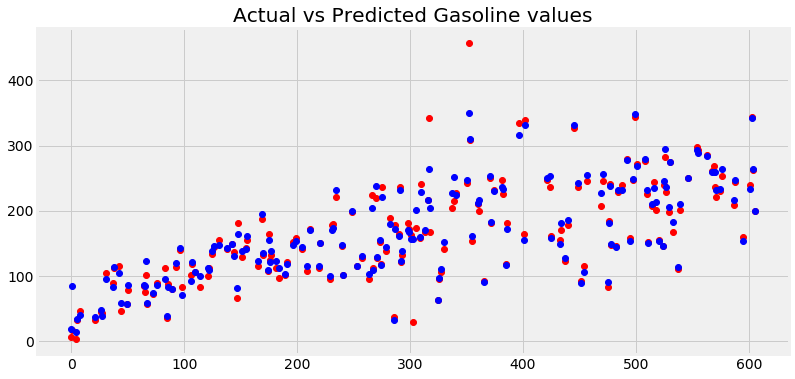

In [362]:
plt.figure(figsize = (12,6))

plt.style.use('fivethirtyeight')
plt.plot(Engre['Actual'],'ro')
plt.plot(Engre['Predicted'],'bo')
plt.title('Actual vs Predicted Gasoline values')


plt.show()

## Predicting GHG savings

In [363]:
#decide variables
x1 = data.drop(['GHG_savings_kg'],axis = 1)
y1 = data['GHG_savings_kg']

In [364]:
x1.columns

Index(['No_Of_Sessions', 'Unique_Drivers', 'No_of_ports', 'Energy_kwh',
       'Charge_time', 'Gasoline_Savings', 'Speed_energy_transmittion', 'Year',
       'day', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [365]:
# Model building
# train_test split
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x1,y1,test_size = 0.3,random_state = 33)

### Linear regression

In [366]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

In [367]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_lr, Y_test)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_lr,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_lr,Y_test))))

MAE:0.28695818966811965
MSE:0.1161754086333102
RMSE:0.5356847857351557


### Random forest regressor

In [368]:
from sklearn.ensemble import RandomForestRegressor
rfr  =RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

In [369]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_rfr, Y_test)))



from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_rfr,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_rfr,Y_test))))

MAE:0.6236263736263732
MSE:3.776098901098899
RMSE:0.7897001795785368


### XGB Regressor

In [370]:
import xgboost as XGB
xgb = XGB.XGBRegressor()
xgb.fit(X_train,Y_train)
y_pred_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

[11:45:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [371]:
from sklearn.metrics import mean_absolute_error
print('MAE of test: '+ str(mean_absolute_error(y_pred_xgb, Y_test)))
print('MAE of train:'+ str(mean_absolute_error(y_train_xgb, Y_train)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_xgb,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_xgb,Y_test))))

MAE of test: 0.5880699328013829
MAE of train:0.16856097500279266
MSE:3.005989074625163
RMSE:0.7668571788810371


#### Feature importance in XGBRegressor

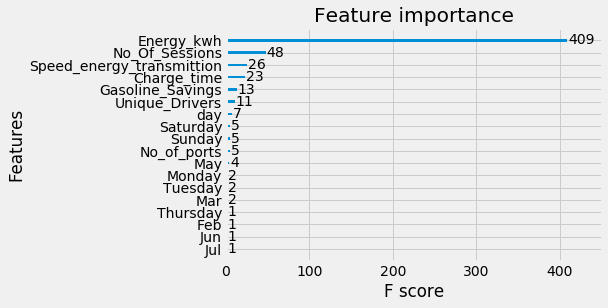

In [372]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


# plot feature importance
plot_importance(xgb)
plt.show()

### boosting tree visualization

<Figure size 864x432 with 0 Axes>

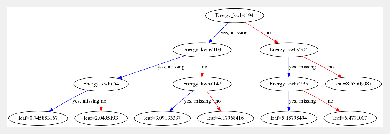

In [373]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize =(12,6))
plot_tree(xgb,num_trees=5)
plt.show()

#### Model Results in predicting GHG:-
- Linear Regression              - 99.8%
- Random Forest Regressor        - 99.5%
- XGB Regressor                  - 99.5%

### Actual vs Predicted GHG values

In [374]:
Ghgre = pd.DataFrame()
Ghgre['Actual'] = Y_test
Ghgre['Predicted'] = y_pred_xgb

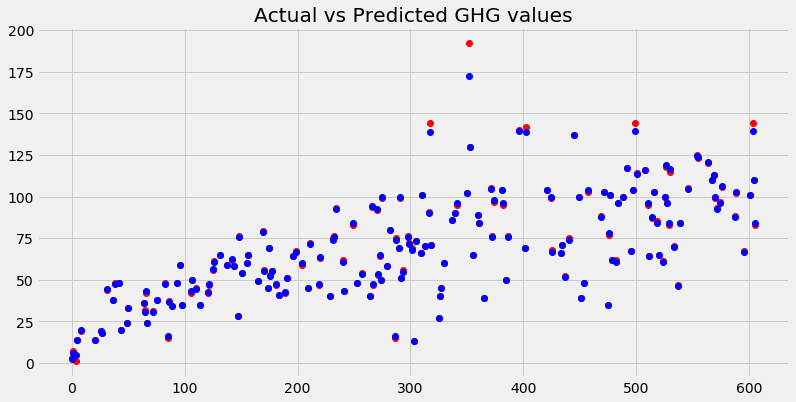

In [375]:
plt.figure(figsize = (12,6))
plt.plot(Ghgre['Actual'],'ro')
plt.plot(Ghgre['Predicted'],'bo')
plt.title('Actual vs Predicted GHG values')


plt.show()

## Predicting Gasoline savings

In [376]:
#decide variables
x2 = data.drop(['Gasoline_Savings'],axis = 1)
y2 = data['Gasoline_Savings']

In [377]:
x2.columns

Index(['No_Of_Sessions', 'Unique_Drivers', 'No_of_ports', 'Energy_kwh',
       'GHG_savings_kg', 'Charge_time', 'Speed_energy_transmittion', 'Year',
       'day', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Friday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [378]:
# Model building
# train_test split
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x2,y2,test_size = 0.3,random_state = 33)

### Linear regression

In [379]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

In [380]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_lr, Y_test)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_lr,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_lr,Y_test))))

MAE:1.4079780094741
MSE:4.771132087600069
RMSE:1.1865824916431642


### Random Forest Regressor

In [381]:
from sklearn.ensemble import RandomForestRegressor
rfr  =RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

In [382]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_rfr, Y_test)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_rfr,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_rfr,Y_test))))

MAE:1.1139565934065934
MSE:3.2888381093956047
RMSE:1.055441421115636


### XGBoost regressor

In [383]:
import xgboost as XGB
xgb = XGB.XGBRegressor()
xgb.fit(X_train,Y_train)
y_pred_xgb = xgb.predict(X_test)

[11:45:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [384]:
from sklearn.metrics import mean_absolute_error
print('MAE:'+ str(mean_absolute_error(y_pred_xgb, Y_test)))

from sklearn.metrics import mean_squared_error
print('MSE:' +str(mean_squared_error(y_pred_xgb,Y_test)))

from math import sqrt
print('RMSE:'+str(sqrt(mean_absolute_error(y_pred_xgb,Y_test))))

MAE:1.1320944491271134
MSE:2.9796835405946656
RMSE:1.0639992712061006


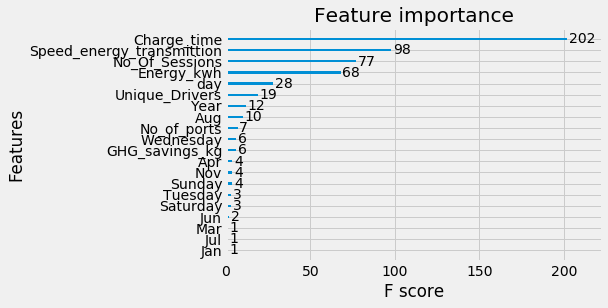

In [385]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb)
plt.show()

<Figure size 3600x720 with 0 Axes>

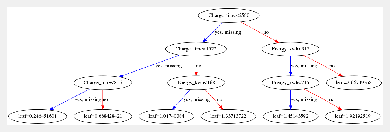

In [386]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize =(50,10))
plot_tree(xgb,num_trees=5)
#xgb.to_graphviz(xgb, num_trees=2)
#plt.rcParams['figure.figsize'] = [12, 10]
#plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

#### Model Results in predicting Gasoline:-
- Linear Regression              - 98.6%
- Random Forest Regressor        - 98.8%
- XGB Regressor                  - 98.9%

### Actual vs predicted

In [387]:
Gasre = pd.DataFrame()
Gasre['Actual'] = Y_test
Gasre['Predicted'] = y_pred_xgb

In [388]:
Gasre

,Actual,Predicted
477,30.19,31.283628
445,41.04,44.190590
381,30.94,30.734756
44,7.11,8.118158
529,24.78,24.567326
...,...,...
310,24.45,24.631430
191,20.09,17.668150
402,39.85,41.246346
8,6.12,6.849009


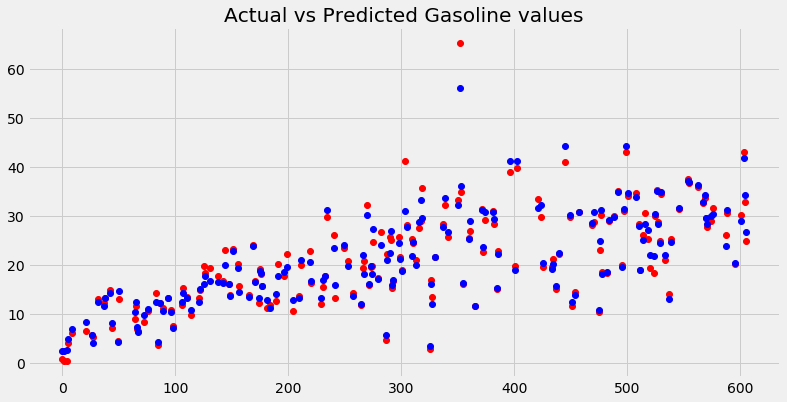

In [389]:
plt.figure(figsize = (12,6))
plt.plot(Gasre['Actual'],'ro')
plt.plot(Gasre['Predicted'],'bo')
plt.title('Actual vs Predicted Gasoline values')


plt.show()